In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def pendulo(theta, w, t, g, L):
  dtheta = w
  dw = -(g/L) * np.sin(theta)
  return dtheta, dw

In [ ]:
L = 9.8 #comprimento
g = 9.8 #aceleração da gravidade
n = 50

#discretizando o tempo
tempo = np.linspace(0, 4, n)
h = tempo[1] - tempo[0]
theta = np.pi/6
w = 0 #dtheta = w


In [ ]:
#Lista para guardar os valores para os gráficos
posicao_angular = []
velocidade_angular = []
temporal = []

#Calculando a evolução das variáveis
for t in tempo:
  #Calculando K1
  k1theta, k1w = pendulo(theta, w, t, g, L)

  #Calculando K2
  k2theta, k2w = pendulo(theta + h * k1theta/2, w + h * k1w/2, t + h/2, g, L)

  #Calculando K3
  k3theta, k3w = pendulo(theta + h * k2theta/2, w + h * k2w/2, t + h/2, g, L)

  #Calculando K4
  k4theta, k4w = pendulo(theta + h * k3theta, w + h * k3w, t + h, g, L)

  #Novo theta
  ntheta = theta + h * (k1theta + 2 * k2theta + 2 * k3theta + k4theta)/6

  #Novo w
  nw = w + h * (k1w + 2 * k2w + 2 * k3w + k4w)/6

  #Atualizando os valores para a próxima iteração
  theta = ntheta
  w = nw

  #Guardando os valores de cada iteração
  posicao_angular.append(theta)
  velocidade_angular.append(w)
  temporal.append(t)

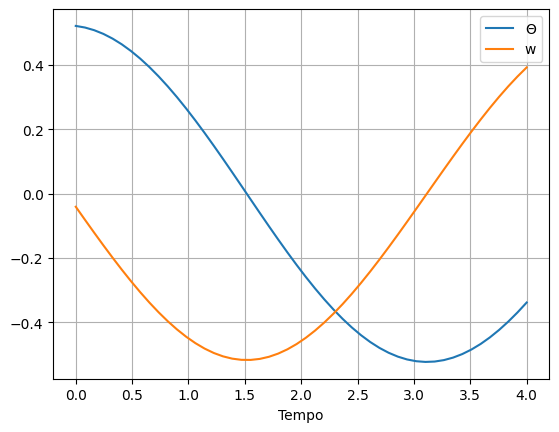

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(temporal, posicao_angular, label = r'$\Theta$')
plt.plot(temporal, velocidade_angular, label = 'w')
plt.xlabel('Tempo')
plt.grid()
plt.legend()
plt.show()
plt.savefig('bonito.png')